<table>
<table border = 5  align = center bgcolor="white" cellspacing="10px">

<tr>
<td><a href="https://drive.google.com/file/d/14xyJ2jPl08F83shEcXM4C8FM6GJSgYaR/view?usp=sharing"> <img alt="Colaboratory logo" width="150px"  src="https://miro.medium.com/max/986/1*S2AyJcdw8EPcn7gwDVSBCA.png" align="left" hspace="10px" vspace="0px" /> </a> </td>
   
    
 
<td></td>
    
<td><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitmilab.redclara.net%2FhalleyUIS%2Fmoncora.git/4d1344cb6f0df9a23bce6fe9d70812719aeb0fe5?urlpath=lab%2Ftree%2FBook%2FJupyter_Notebooks%2FDatosIII.ipynb"><img src="https://mybinder.org/static/images/logo_social.png" alt="Alternative text" width="150px"  /></a>
</td>

</tr>

</table>
    
<br>

# **Los datos hablan III**

En esta sección aprenderás a hacer un análisis de tus datos a través de gráficas y valores númericos de correlación de variables. Aprenderás a distinguir cuando una variable depende de otra de manera proporcional y cómo modelar matemáticamente dicha relación. En la última sección tienes ejercicios para que puedas practicar.

In [2]:
#Nota: Si esta trabajando en  Colab necesitarás instalar la Api de Makesens
#!pip install APIMakeSens

In [3]:
## Importamos las librerías
import random                      # Para números aleatorios
import pandas as pd                # Para conjuntos de datos
import numpy as np                 # Para cálculos matemáticos con matrices y vectores
import seaborn as sns              # Para visualización de datos estadistícos
import scipy as sp                 # Para cálculo estadistícos como regresión lineal
import matplotlib.pyplot as plt    # Para hacer gráficas
import matplotlib.dates as mdates  # Para manejar datos de fechas
from MakeSens import MakeSens      # Para descargar los datos de las estaciones

In [4]:
## Establecemos el estilo de grafico
lista_estilos = plt.style.available       # Lista de los estilos de graficos en python
tamaño = len(lista_estilos)               # Número de estilos en la lista
print(lista_estilos,tamaño)

## Seleccionamos un estilo aleatorio de la lista
N = np.random.randint(0,tamaño)           # Número aleatorio
plt.style.use(lista_estilos[N])           # Pedimos usar el estilo de la componente N de la lista
print('Estás usando el estilo: '+lista_estilos[N])

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10'] 28
Estás usando el estilo: seaborn-white


In [5]:
#plt.style.use('seaborn-v0_8-ticks')

## **1. Recopilación de datos**

Primero recopilamos los datos y los guardamos en una variable `DataFrame` a la que llamaremos `data`.

> **Nota:** Cuando la columna de índices se convierte a una variable `Datetime` python puede leer más rápido los datos y esto permite que podamos hacer graficas sin que transcurra demasiado tiempo.

In [6]:
estacion = 'mE1_00008'           # Nombre estacion miniEva
start = '2023-09-5 00:00:00'    # Fecha de inicio: año-mes-día hora:minuto:segundo
end   = '2023-09-13 23:00:00'    # Fecha de fin:    año-mes-día hora:minuto:segundo

data = MakeSens.download_data(estacion, start, end,'1T') # Descargar los datos
data.index = pd.DatetimeIndex(data.index)                # Convertir a tipo datetime el índice

**Nota:** `data.head()` nos permite hechar un vistazo a las columnas de datos que tenemos. En total tenemos 32 columnas, en este enlace puedes conocer acerca de cada una de ellas: [Campo de datos](https://docs.makesens.co/productos/minieva/acceso-a-los-datos/campos-de-datos)

In [7]:
data.head(5)

humedad2  pm_n_2_5_2  pm25_1  pm25_2  pm1_1_AE  \
2023-04-30 00:00:00  56.005188         4.0    14.0    14.0      11.0   
2023-04-30 00:02:00  56.545357         6.0    19.0    17.0      12.0   
2023-04-30 00:04:00  57.218281        10.0    15.0    20.0      12.0   
2023-04-30 00:06:00  57.489891         4.0    36.0    36.0      25.0   
2023-04-30 00:08:00  57.978180         6.0    23.0    19.0      16.0   

                     pm10_2_AE  pm_n_2_5_1  iluminancia  pm1_1  pm25_1_AE  \
2023-04-30 00:00:00       15.0         6.0          9.0   11.0       14.0   
2023-04-30 00:02:00       17.0         4.0          9.0   12.0       19.0   
2023-04-30 00:04:00       22.0         2.0          9.0   12.0       15.0   
2023-04-30 00:06:00       36.0         8.0          9.0   29.0       33.0   
2023-04-30 00:08:00       20.0         6.0          9.0   16.0       23.0   

                     ...  pm_n_0_3_1  pm_n_5_0_1  pm_n_5_0_2  pm10_2  pm10_1  \
2023-04-30 00:00:00  ...      1809.0         NaN         2.0    15.0    14.0   
2023-04-30 00:02:00  ...      2100.0         NaN         NaN    17.0    19.0   
2023-04-30 00:04:00  ...      1905.0         NaN         4.0    22.0    15.0   
2023-04-30 00:06:00  ...      4818.0         NaN         NaN    36.0    36.0   
2023-04-30 00:08:00  ...      2634.0         NaN         2.0    20.0    23.0   

                     pm25_2_AE  pm_n_1_0_1  pm_n_1_0_2  longitud  latitud  
2023-04-30 00:00:00       14.0        71.0        66.0      None     None  
2023-04-30 00:02:00       17.0       122.0       113.0      None     None  
2023-04-30 00:04:00       20.0        93.0       122.0      None     None  
2023-04-30 00:06:00       33.0       159.0       184.0      None     None  
2023-04-30 00:08:00       19.0       139.0       126.0      None     None  

[5 rows x 32 columns]

## **2. Limpieza de datos**

Para esta parte trabajaremos con los datos de material particulado: PM1, PM2.5 y PM10. Vamos a limpiar nuestro datos, pero primero, exploremos como se ven nuestros datos



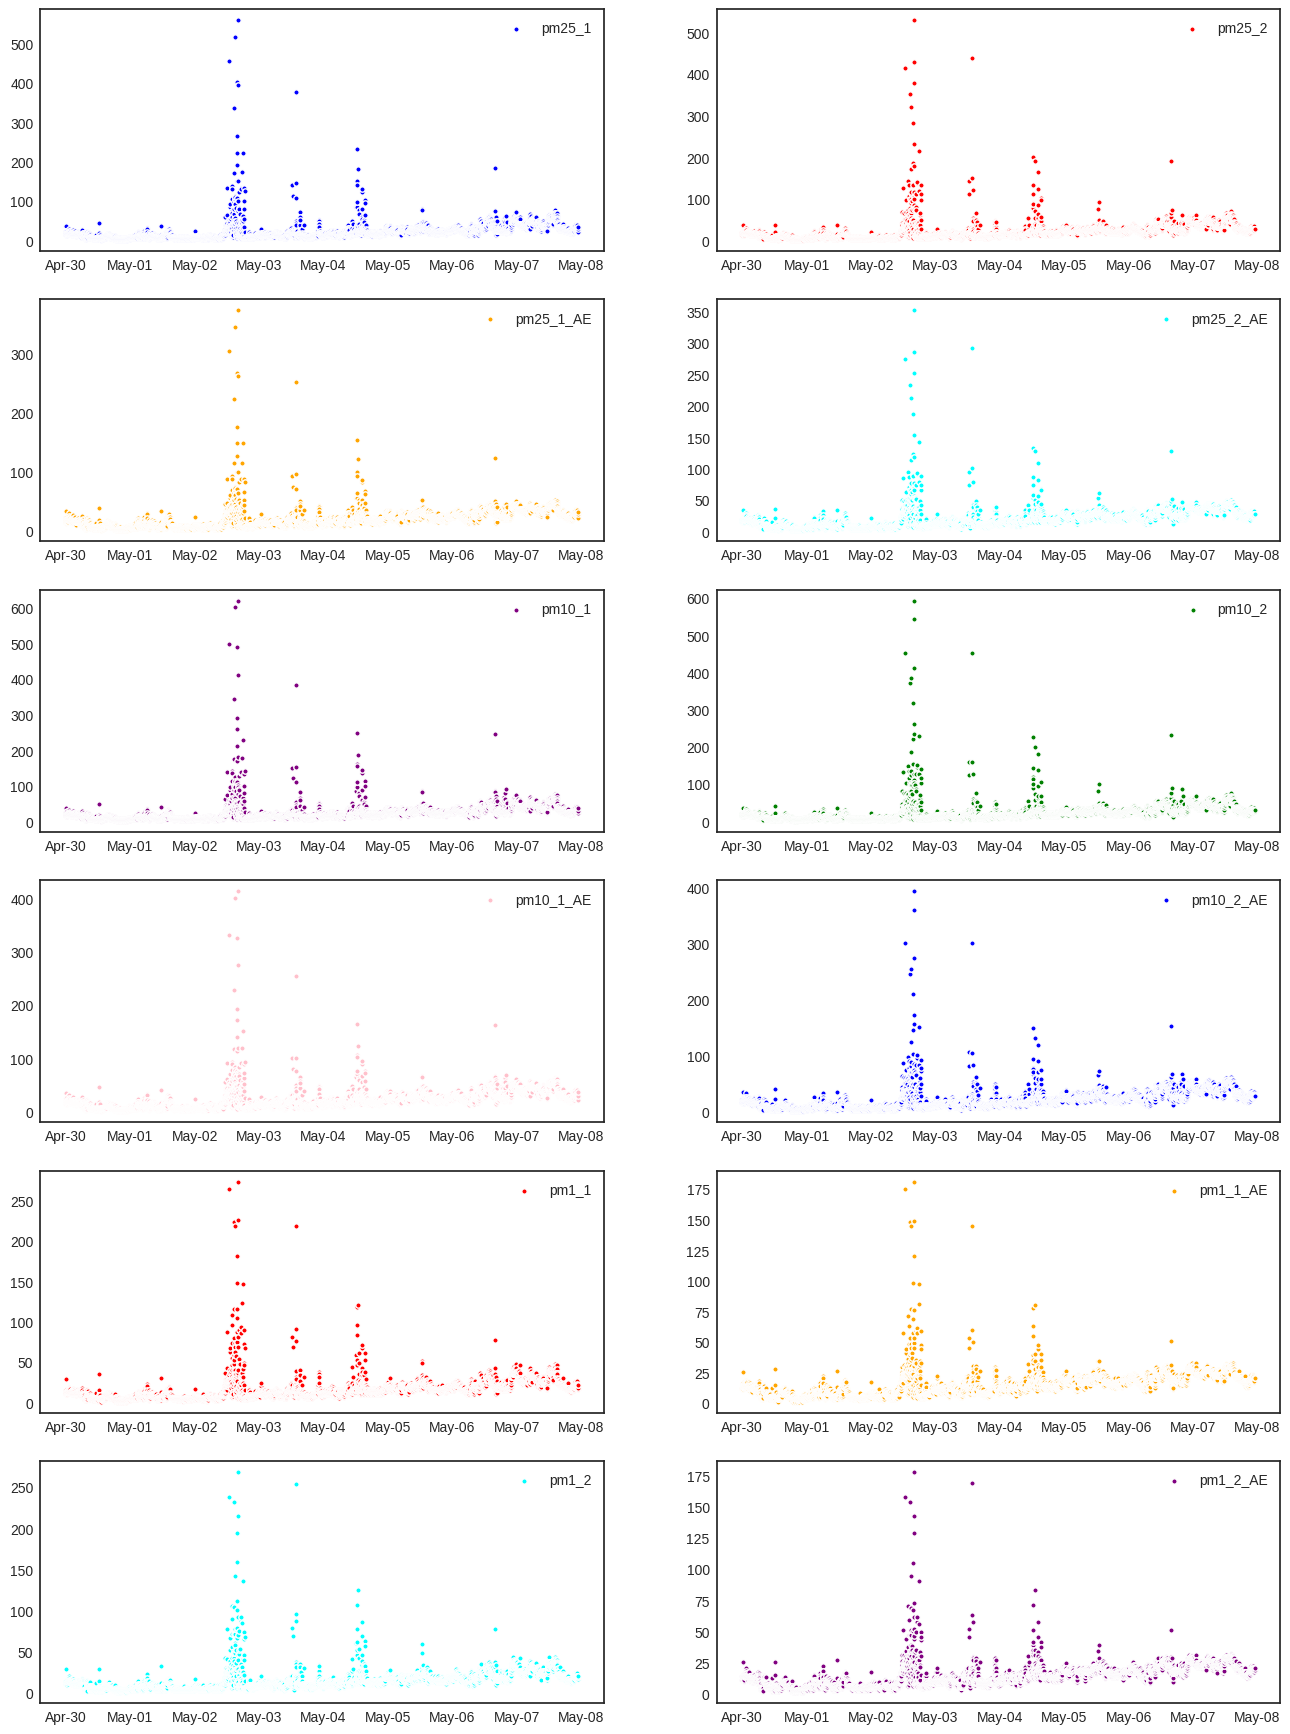

In [8]:
## Listamos las columnas que deseamos limpiar
columnas = ['pm25_1','pm25_2','pm25_1_AE','pm25_2_AE','pm10_1','pm10_2','pm10_1_AE','pm10_2_AE', 'pm1_1', 'pm1_1_AE', 'pm1_2','pm1_2_AE']

## Hacemos una gráfica de datos sin limpieza
colors = ['blue','red','orange','cyan','purple','green','pink','blue','red','orange','cyan','purple'] # Lista de colores

plt.figure(figsize=(16,22))          # Creamos la figura

for i in range(len(columnas)):       # Íteramos entre las columnas de PM
    
    ax = plt.subplot(6,2,i+1)        # Graficamos en subfiguras
    
    plt.scatter(data.index,          # Datos eje x 
                data[columnas[i]],   # Datos eje y
                label=columnas[i],   # Etiqueta de los datos
                s=15,                # Tamaño de los puntos
                color=colors[i],     # Color de los puntos
                edgecolors='white')  # Color borde de los puntos
    
    plt.legend()  # Mostramos leyendas
    
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))  # Cambiamos el formato de las fechas en el eje x
    ax.tick_params(which='major',      # Seleccionamos el eje mayor (eje x)
                    pad=5,             # Distanica de la etiqueta a los ticks
                    labelsize=10,      # Tamaño de letra de la etiqueta
                    direction="inout") # Pone a la barra de los ticks a la mita del eje x 
    
plt.show()        # Mostramos grafica 

**Nota:** El formato de fechas `'%b-%d'` significa que sobre el eje x las fechas están dispuestas en la forma `mes-día`. Dónde el mes esta puesto con su respectivo nombre abreviado. Otras posibilidades son: `%m-%d` para mes-día en formato decimal, `%d-%m-%y` para día-mes-año en formato decimal.

|Directiva|Significado|Ejemplo|
|--|--|--|
|`%w`|Día de la semana como número decimal. 0 es domingo y 6 es sábado|0, ..., 6|
|`%d`|Día del mes como número decimal|01, 02, ..., 31|
|`%m`|Mes como número decimal|01, 02, ..., 12|
|`%y`|Año sin las centenas como número decimal|00, 01, ..., 99|
|`%b`|Mes como su nombre abreviado (en Inglés)|Jan, Feb, ..., Dec|

[Tabla de formato de fechas](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes)

Como en la sección anterior (Los datos hablan II), vamos a  eliminar los valores por encima de 120 $\mu g/m^3$. Recuerda que elegimos 120 $\mu g/m^3$ como un valor de referencia pero que esta sujeto a cambios. Por ejemplo los sensores de la estaciones pueden medir correctamente concentración de material particulado entre 0-500 $\mu g/m^3$ [[*]](https://docs.makesens.co/productos/minieva/acceso-a-los-datos/campos-de-datos), pero para Bucaramanga los valores típicos de PM suelen estar por debajo de 100 $\mu g/m^3$ (Inferior a la alerta naranja).

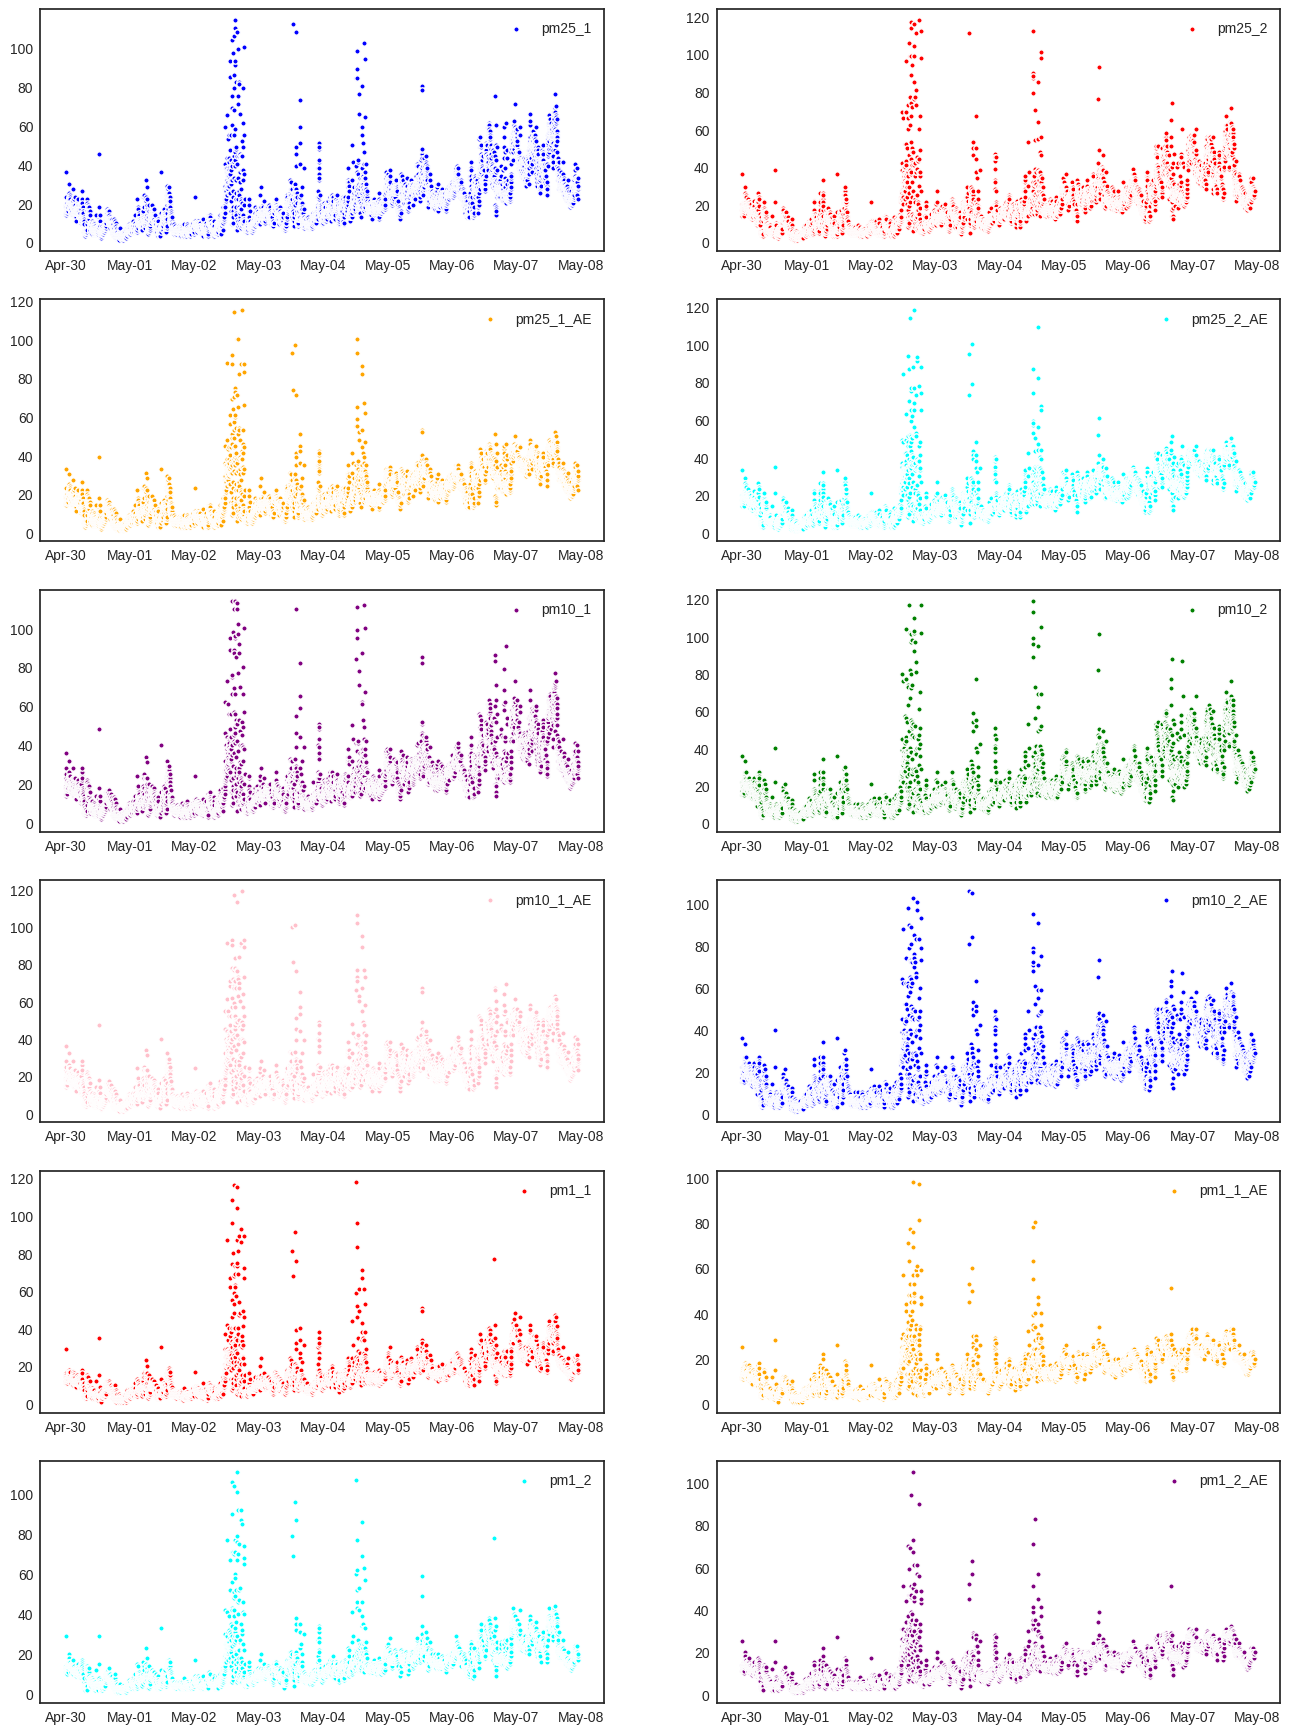

In [9]:
## Hacemos limpieza de datos y volvemos a graficas nuentro datos
for columna in columnas:                                             # Iteramos entre cada columna
    data[columna] = data[columna].where(
                                        data[columna]<120,  # Condición para conservar el dato
                                        np.nan              # Valor por el que se reemplaza el dato si se incumple la condición anterior
                                        )   
    
## Graficamos los datos luego de la limpieza
plt.figure(figsize=(16,22))         # Creamos la figura

for i in range(len(columnas)):      # Iteramos entre las columnas de PM 
    
    ax = plt.subplot(6,2,i+1)       # Graficamos en subfiguras
    
    plt.scatter(data.index,         # Datos eje x
                data[columnas[i]],  # Datos eje y
                label=columnas[i],  # Etiqueta de los datos
                s=15,               # Tamaño de los puntos
                color=colors[i],    # Color de los puntos
                edgecolors='white') # Color del borde de los puntos
    
    plt.legend()  # Mostramos leyendas
    
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))  #Formato para el eje x
    ax.tick_params(which='major',      # Seleccionamos el eje mayor (eje x)
                    pad=5,             # Distanica de la etiqueta a los ticks
                    labelsize=10,      # Tamaño de letra de la etiqueta
                    direction="inout") # Pone a la barra de los ticks a la mita del eje x 
    
plt.show()        # Mostramos grafica 

## **3. Variación de datos entre sensores**

* **¿Podemos promediar los datos del sensor 1 con los del sensor 2?**

    Sí pero bajo ciertas condiciones. Necesitamos que los datos entre ambos sensores sean ceranos. El valor que mide la cercanía de datos es el **coeficiente de variación (CV)**. Tomamos fila de datos y en ella promediamos el valor del sensor 1 y del sensor 2, calculamos el coeficiente CV en esta fila. Si el promedio del coeficiente de variación de una columna de datos es menor a `CV<0.3`, entonces es válido usar el promedio; caso contrario no lo es.

> El coeficiente de variación es la división entre la desviación estándar y el promedio. Este mide qué tanto se dispersan los datos comparados con el valor medio.

In [66]:
# Cambiamos el nombre de las columnas de 'temperatura' y 'humedad' por 'temperatura1' y 'humedad1' para
# incluirlas en el análisi del coeficiente de variación
data = data.rename(index=str, columns={'temperatura':'temperatura1', 'humedad':'humedad1'})
data.columns  # Muestra las nuevas columnas

Index(['humedad2', 'pm_n_2_5_2', 'pm25_1', 'pm25_2', 'pm1_1_AE', 'pm10_2_AE',
       'pm_n_2_5_1', 'iluminancia', 'pm1_1', 'pm25_1_AE', 'pm1_2', 'humedad1',
       'temperatura1', 'presion', 'pm_n_10_0_2', 'pm_n_10_0_1', 'pm1_2_AE',
       'pm10_1_AE', 'pm_n_0_5_2', 'temperatura2', 'pm_n_0_3_2', 'pm_n_0_5_1',
       'pm_n_0_3_1', 'pm_n_5_0_1', 'pm_n_5_0_2', 'pm10_2', 'pm10_1',
       'pm25_2_AE', 'pm_n_1_0_1', 'pm_n_1_0_2', 'longitud', 'latitud'],
      dtype='object')

**Nota:** Las variables que tienen dos valores de medición son: 'pm25', 'pm10', 'pm1', 'humedad' y 'temperatura'. Calcularemos el coeficiente de variación para ellas.

In [67]:
## Definimos columnas de datos por separado
cols_sensor1 = ['pm25_1','pm25_1_AE','pm10_1','pm10_1_AE','pm1_1', 'pm1_1_AE', 'humedad1', 'temperatura1']
cols_sensor2 = ['pm25_2','pm25_2_AE','pm10_2','pm10_2_AE','pm1_2', 'pm1_2_AE', 'humedad2', 'temperatura2']
cols_new = ['pm25','pm25_AE','pm10','pm10_AE','pm1','pm1_AE','humedad','temperatura']

## Calculamos coeficiente de variación
mean = pd.DataFrame({})     # Promedios
std = pd.DataFrame({})      # Desviaciones estandar
CV = pd.DataFrame({})       # Coeficiente de variación
for i in range(len(cols_sensor1)):             # Iteramos entre cada columnas
    col1 = cols_sensor1[i]                     # Nombre primera columna (sensor 1)
    col2 = cols_sensor2[i]                     # Nombre segunda columna (sensor 2)
    mean[col1] = (data[col1] + data[col2])/2   # Promedio
    std[col1] = np.sqrt( (mean[col1]-data[col1])**2 + (mean[col1]-data[col2])**2 ) # Desviación estandar
    CV[col1] = std[col1]/mean[col1]            # Coeficiente de variación

## Analizamos si los promedios del coeficiente de variación son menores a 0.3
CV_mean = CV.mean()
for i in range(len(cols_sensor1)):
    col1 = cols_sensor1[i]       # Nombre primera columna (sensor 1)
    col2 = cols_sensor2[i]       # Nombre segunda columna (sensor 2)
    col_new = cols_new[i]        # Nombre columna nueva
    if CV_mean[col1]<0.3:         # Si CV_mean < 0.3 entonces guarda el promedio en el dataset
        data[col_new] = mean[col1]

Analicemos con detalle el los DataFrame del código:

In [68]:
mean.head()

pm25_1  pm25_1_AE  pm10_1  pm10_1_AE  pm1_1  pm1_1_AE  \
2023-04-30 00:00:00    14.0       14.0    14.5       14.5   11.0      11.0   
2023-04-30 00:02:00    18.0       18.0    18.0       18.0   11.5      11.5   
2023-04-30 00:04:00    17.5       17.5    18.5       18.5   13.0      13.0   
2023-04-30 00:06:00    36.0       33.0    36.0       36.0   29.0      25.0   
2023-04-30 00:08:00    21.0       21.0    21.5       21.5   15.0      15.0   

                      humedad1  temperatura1  
2023-04-30 00:00:00  58.595011     31.109080  
2023-04-30 00:02:00  58.976732     31.113384  
2023-04-30 00:04:00  59.634209     31.080302  
2023-04-30 00:06:00  60.114778     31.198839  
2023-04-30 00:08:00  60.281987     30.987728

In [69]:
std.head()

pm25_1  pm25_1_AE    pm10_1  pm10_1_AE     pm1_1  \
2023-04-30 00:00:00  0.000000   0.000000  0.707107   0.707107  0.000000   
2023-04-30 00:02:00  1.414214   1.414214  1.414214   1.414214  0.707107   
2023-04-30 00:04:00  3.535534   3.535534  4.949747   4.949747  1.414214   
2023-04-30 00:06:00  0.000000   0.000000  0.000000   0.000000  0.000000   
2023-04-30 00:08:00  2.828427   2.828427  2.121320   2.121320  1.414214   

                     pm1_1_AE  humedad1  temperatura1  
2023-04-30 00:00:00  0.000000  3.662563      1.031856  
2023-04-30 00:02:00  0.707107  3.438484      0.988003  
2023-04-30 00:04:00  1.414214  3.416638      0.955486  
2023-04-30 00:06:00  0.000000  3.712152      1.044646  
2023-04-30 00:08:00  1.414214  3.258074      0.867373

In [70]:
CV.head()

pm25_1  pm25_1_AE    pm10_1  pm10_1_AE     pm1_1  \
2023-04-30 00:00:00  0.000000   0.000000  0.048766   0.048766  0.000000   
2023-04-30 00:02:00  0.078567   0.078567  0.078567   0.078567  0.061488   
2023-04-30 00:04:00  0.202031   0.202031  0.267554   0.267554  0.108786   
2023-04-30 00:06:00  0.000000   0.000000  0.000000   0.000000  0.000000   
2023-04-30 00:08:00  0.134687   0.134687  0.098666   0.098666  0.094281   

                     pm1_1_AE  humedad1  temperatura1  
2023-04-30 00:00:00  0.000000  0.062506      0.033169  
2023-04-30 00:02:00  0.061488  0.058302      0.031755  
2023-04-30 00:04:00  0.108786  0.057293      0.030742  
2023-04-30 00:06:00  0.000000  0.061751      0.033483  
2023-04-30 00:08:00  0.094281  0.054047      0.027991

In [71]:
print(CV_mean)

pm25_1          0.086171
pm25_1_AE       0.081581
pm10_1          0.096040
pm10_1_AE       0.094083
pm1_1           0.074154
pm1_1_AE        0.069322
humedad1        0.059629
temperatura1    0.031284
dtype: float64


## **4. Correlación de datos**

### <strong> <center> Correlación lineal </center> </strong>

El objetivo de esta sección es analizar el grado de la relación existente entre variables usando modelos matemáticos. Por ejemplo, ¿en qué medida un aummento de los gastos en publicidad hace aumentar las ventas de un determinado producto?, ¿cómo cambia la humudad con el aumento de la presión o temperatura? El estudio de relación diferente de una relación funcional entre dos variables se llama e análisis de correlación.

#### **Definición:**

Tenemos la tarea de estudiar si existe o no algún tipo de relación entre dos variables. Así, por ejemplo, podemos preguntarnos si hay alguna relación entre la medición de $PM2.5$ y la de $PM10$. Una primera aproximación al problema consistiría en dibujar en el plano un punto por cada medición: la primera coordenada de cada punto sería la medición de $PM2.5$, mientras que la segunda coordenada sería la medición respectiva de $PM10$. Así, tendríamos una nube de puntos en la cual se haría evidente si existe algún tipo de relación (lineal, parabólica, exponensial, etc.) entre ambos PM. En partícular, queremos cuantificar que tan parecida a una línea recta es la nube de puntos de las dos variables. El parámetro que nos da tal cuantificación es el coeficiente de correlación lineal de Pearson, $r$, cuyo valor oscila entre $–1$ y $+1$.

<img width="800px"  src="https://raw.githubusercontent.com/AndresGuarin/Images/main/moncora/correlacion.jpg" align="center">

Para hacer correctamente la correlación de datos y evitar errores vamos a copiar el data_set y vamos a cambiar la columna de índices por una de números enteros.

In [72]:
data_ = data.copy()                  # Copiamos el dataset
data_ = data_[sorted(data_.columns)] # Ordenamos columnas

## Lista de columnas redundantes
lista_cols = ['pm_n_2_5_2','pm_n_2_5_1','pm_n_10_0_2', 'pm_n_10_0_1', 'pm_n_0_5_2','pm_n_0_3_2','pm_n_0_5_1', 'pm_n_0_3_1', 'pm_n_5_0_1', 'pm_n_5_0_2', 'pm_n_1_0_1', 'pm_n_1_0_2', 'latitud', 'longitud']

## Analizamos si hay columnas de promedio y las agregamos a lista_cols
for i, col in enumerate(cols_new):  # Iteramos sobre cada columna
    col1 = cols_sensor1[i]          # Nombre primera columna (sensor 1)
    col2 = cols_sensor2[i]          # Nombre segunda columna (sensor 2)
    if col in data.columns:         # Verificamos si col ya existe en el dataset
        lista_cols.append(col1)     # Agregamos col1 y col2 a la lista de columnas redundantes
        lista_cols.append(col2)
    else:
        data_[col] = data[col1]     # Creamos una nueva columna de nombre col, con los valores del sensor 1 por defecto

## Eliminamos columnas redundantes
for columna in lista_cols:          # Iteramos sobre cada columna redundante
    del data_[columna]

## Cambiamos la columna de índices por una de números enteros empezando desde 0
data_['index_new'] = np.arange(0,len(data_.index))  # Arreglo de números enteros desde 0 hasta el número de filas del dataset menos uno
data_ = data_.set_index('index_new')                # Cambiamos el índice del dataset

In [73]:
data_.head()

humedad  iluminancia   pm1  pm10  pm10_AE  pm1_AE  pm25  pm25_AE  \
index_new                                                                       
0          58.595011          9.0  11.0  14.5     14.5    11.0  14.0     14.0   
1          58.976732          9.0  11.5  18.0     18.0    11.5  18.0     18.0   
2          59.634209          9.0  13.0  18.5     18.5    13.0  17.5     17.5   
3          60.114778          9.0  29.0  36.0     36.0    25.0  36.0     33.0   
4          60.281987          9.0  15.0  21.5     21.5    15.0  21.0     21.0   

              presion  temperatura  
index_new                           
0          919.924316    31.109080  
1          919.008606    31.113384  
2          919.394836    31.080302  
3          918.058350    31.198839  
4          920.309998    30.987728

### **¿Qué esperamos obtener de los datos?**

Sabemos que el material particulado puede cambiar con factores como la lluvia o con la temperatura, por eso esperaríamos obtener una buena correlación entre el $PM$ y las demás variables ambientales. Igualmente, sabemos que los diferentes valores de $PM$ están ligados entre sí, cuando uno aumenta los demás también tienden a aumentar. Una posible causa de esto es que los diferentes tamaños de material particulado provengan de una misma fuente. En todo caso, debería existir una correlación entre los valores de material particulado. Adicionalmente, no sería extraño que exista una correlación entre algunas variables ambientales debido a que todas ellas caracterizan al clima.

Siempre es util preguntarse que esperamos obtener de los datos antes de hacer el análisis de datos. Nos ayuda a interpretar los resultados y a darnos cuenta de eventos inesperados. Así, hacer un pre-análisis es bastante recomendado en ciencia de datos.

### **Matriz de correlación**

La matriz de correlación cálcula el coeficiente de correlación de Pearson entre cada pareja de datos del data set. Por ejemplo, entre temperatura y presión, temperatura y $PM2.5$, temperatura y $PM10$, etc.

El coeficiente de Pearson $r$ estima si los datos presentan alguna relación de proporcionalidad lineal entre dos variables. Es decir, si una variable aumenta la otra aumenta o disminuye siempre en la misma proporción, por ejemplo, $r=0.5$ implica que cuando la varible $X$ aumenta, la otra $Y$ aumenta el doble. En general, si $X$ aumenta en una cantidad, $Y$ aumenta en un factor de $1/r$ de ella.

Un valor positivo del coeficiente de Pearson indica que si uno aumenta, el otro también lo hace. Un valor negativo indica que si uno aumenta, el otro disminuye.


Aquí vemos ejemplos del valor del coeficiente de Pearson para diversas nubes de datos. Note que $r$ también es cero cuando existe una relación entre los datos pero que no es líneal.

<img src="https://raw.githubusercontent.com/AndresGuarin/Images/main/Correlation_examples2.svg.png"  width="1000px" height="456px">

La matriz de correlación se cálcula con la librería `pandas` desde un dataset. [Más información aquí](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)

In [74]:
## Calculamos la matriz de Correlación de datos
corr = data_.corr() 

In [75]:
corr

humedad  iluminancia       pm1      pm10   pm10_AE    pm1_AE  \
humedad      1.000000    -0.606786 -0.128160 -0.110593 -0.119536 -0.162285   
iluminancia -0.606786     1.000000  0.180771  0.164006  0.166771  0.175716   
pm1         -0.128160     0.180771  1.000000  0.984745  0.978206  0.979509   
pm10        -0.110593     0.164006  0.984745  1.000000  0.991792  0.961274   
pm10_AE     -0.119536     0.166771  0.978206  0.991792  1.000000  0.979559   
pm1_AE      -0.162285     0.175716  0.979509  0.961274  0.979559  1.000000   
pm25        -0.107973     0.162001  0.991543  0.996859  0.988987  0.967141   
pm25_AE     -0.137888     0.174082  0.981797  0.979230  0.993017  0.991765   
presion      0.837698    -0.642040 -0.157911 -0.145167 -0.154332 -0.183065   
temperatura -0.832282     0.627405  0.182994  0.171870  0.181070  0.208297   

                 pm25   pm25_AE   presion  temperatura  
humedad     -0.107973 -0.137888  0.837698    -0.832282  
iluminancia  0.162001  0.174082 -0.642040     0.627405  
pm1          0.991543  0.981797 -0.157911     0.182994  
pm10         0.996859  0.979230 -0.145167     0.171870  
pm10_AE      0.988987  0.993017 -0.154332     0.181070  
pm1_AE       0.967141  0.991765 -0.183065     0.208297  
pm25         1.000000  0.982935 -0.145114     0.172328  
pm25_AE      0.982935  1.000000 -0.169158     0.195559  
presion     -0.145114 -0.169158  1.000000    -0.992926  
temperatura  0.172328  0.195559 -0.992926     1.000000

### **Exploración de los datos**

Tomemos como ejemplo al $PM2.5$. Tenemos la intuición de que el material particulado dependa de las condiciones ambientales como temperatura, presión y humedad. Así, en los datos podemos encontrar si esta hipotesis es válida o no. La columna de la matriz asociada a 'pm25' es la que cuantifica dicha relación de variables. Cuanto mayor sea la correlación en valor absoluto, mayor será la relación lineal.

In [76]:
## Datos de correlación de 'pm25' con las otras variables
corr['pm25']

humedad       -0.107973
iluminancia    0.162001
pm1            0.991543
pm10           0.996859
pm10_AE        0.988987
pm1_AE         0.967141
pm25           1.000000
pm25_AE        0.982935
presion       -0.145114
temperatura    0.172328
Name: pm25, dtype: float64

¿Cuáles son las variables más correlacionadas con `pm25`? Revisémolos visualmente a continuación con un gráfico de barras.

### **Visualización de los datos**
A continuación presentamos distintas maneras de visualizar y analizar los datos de la matriz de correlación. Podemos sacarle buen jugo a los datos de diversas maneras. Cada una tiene un propósito diferente.

#### **Gráfico de Barras**
Un grafico de barras nos ayuda a ver visualmente los valores del coeficiente de Pearson para cada variable en comparación con PM2.5. Antes de graficar, tenemos que `pm25` puede estar correlacionado con las variables ambientales como presión, temperatura, humedad, y con los demás valores de material particulado.

El gráfico de barras o *bar plot* se realiza con la librería `pandas` desde una matriz de correlación. [Más información aquí](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html)

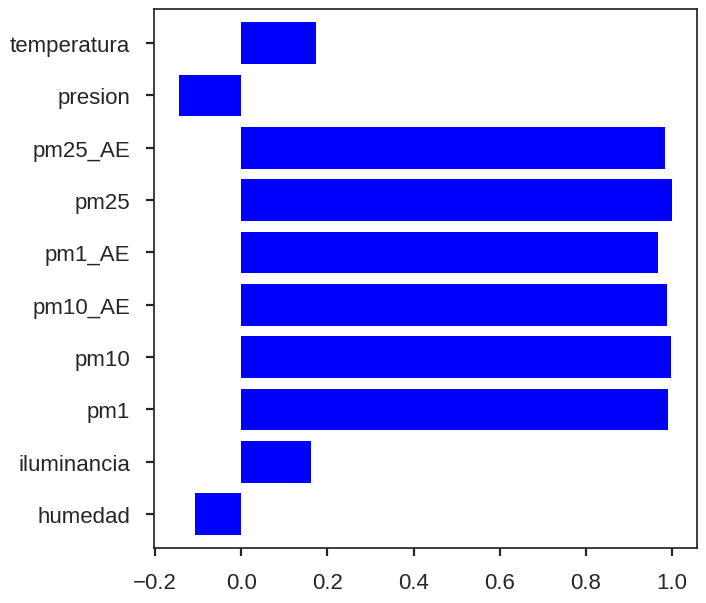

In [81]:
fig, ax = plt.subplots(figsize=(7,7))    # Creamos figura
corr['pm25'].plot.barh(ax=ax,            # Eje de la figura
                       color='blue',     # Color de las barras
                       width=0.8)        # Ancho de las barras (entre 0-1)
plt.show()                               # Mostramos la figura

**Nota:** vemos que para el caso de `pm25` la mayor correlación se encuentra entre los demás valores de material particulado ¿por qué pasa esto?

#### **Mapa de calor**
Un mapa de calor permite visualizar los datos en una matriz. Cada celda de la matriz se colorea de acuerdo al valor que tiene. Los valores cercanos a $+1$ se colorean con un color claro y los valores cercanos a $-1$ con un color oscuro. Esto se cumple para el coloreado por defecto, en general la barra de colores es la que nos indica a qué valor corresponde cada tonalidad.



El mapa de calor o *heat map* se grafica con la librería de visualización de datos `seaborn`. [Más información aquí](https://seaborn.pydata.org/generated/seaborn.heatmap.html) 

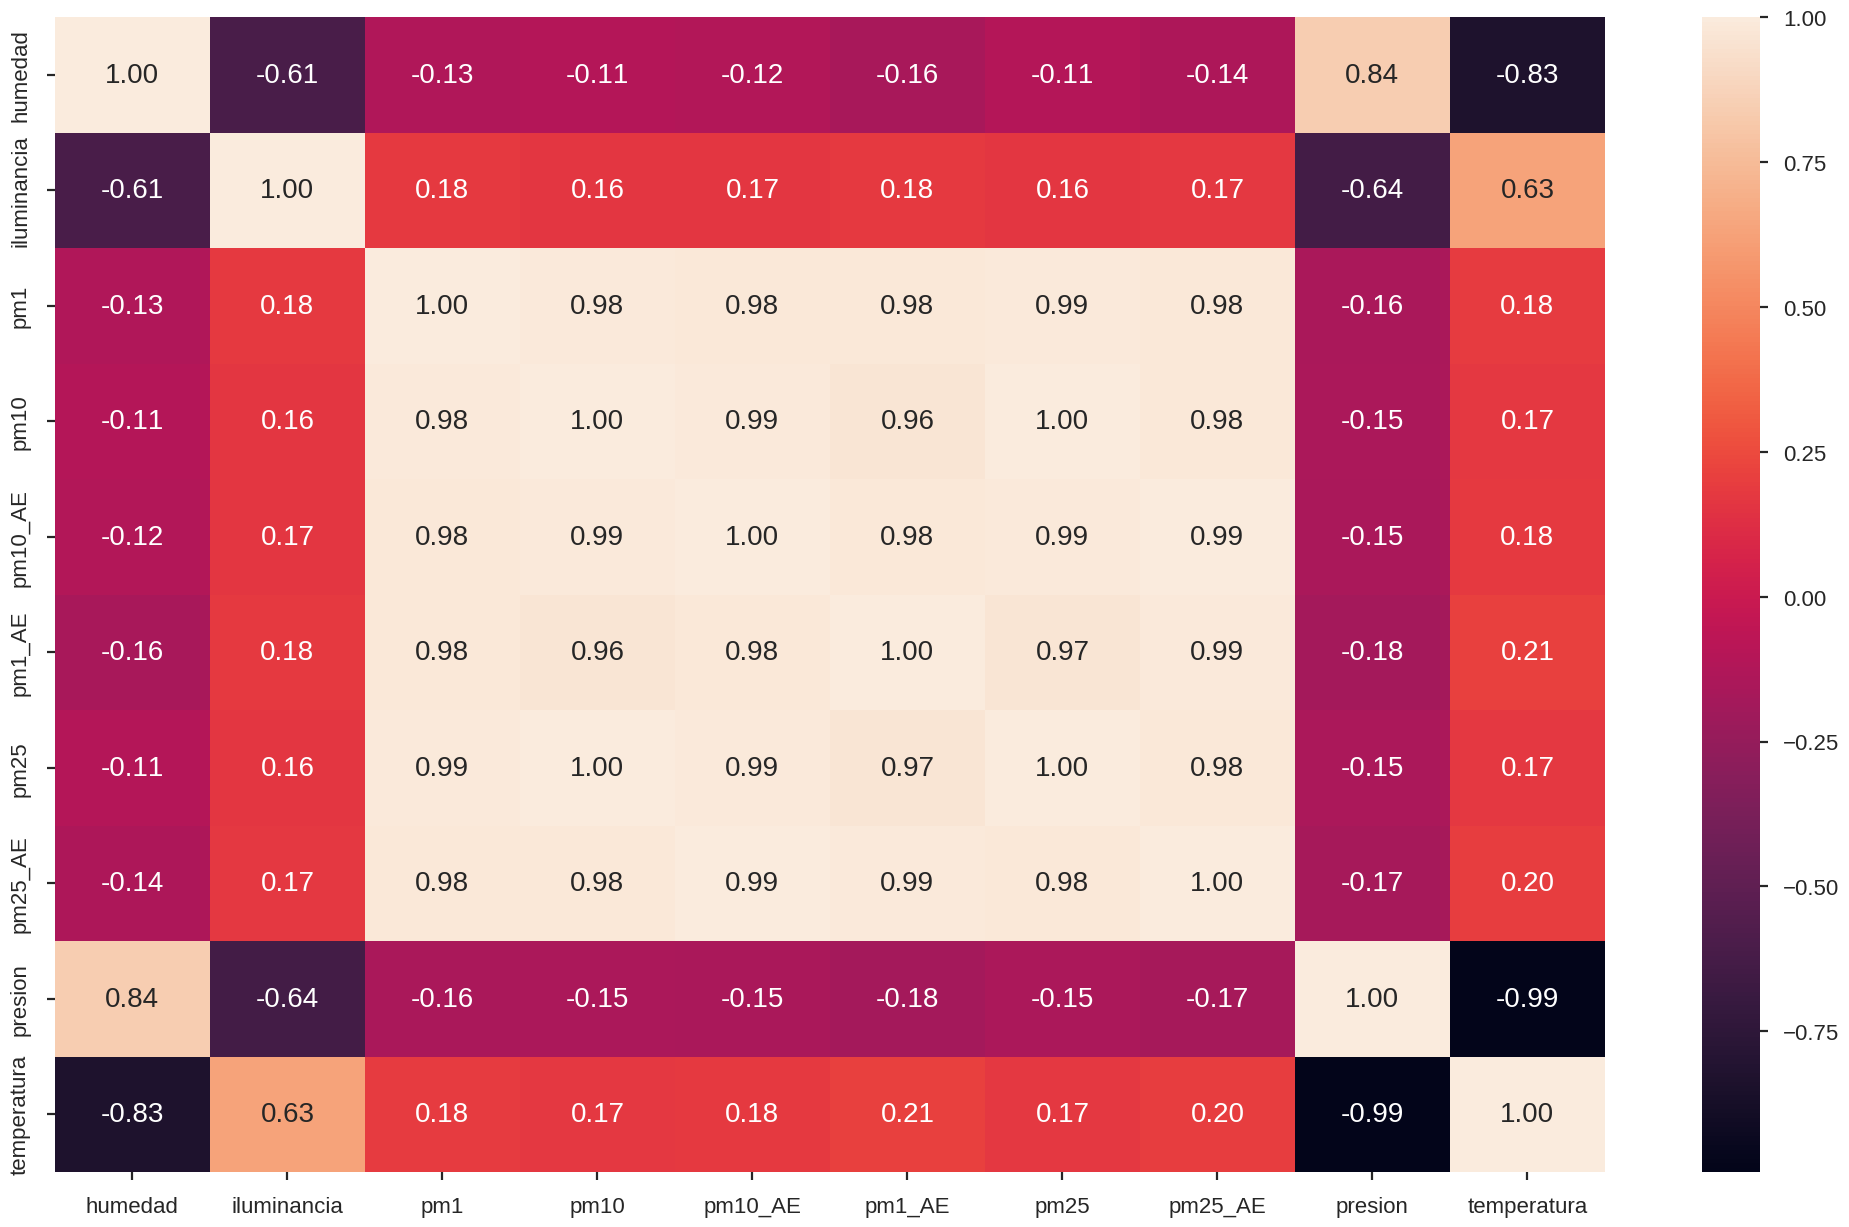

In [170]:
plt.subplots(figsize=(25,15))  # Creamos la figura
sns.heatmap(corr,              # Matriz de correlación 
            annot=True,        # True para que aparezcan los valores en cada celda. False para que no aparezcan.
            fmt=".2f",         # Formato de los valores númericos de cada celda
            annot_kws={        # Caracteristícas del texto de las anotaciones
                'fontsize':20} # Tamaño de letra de las anotaciones
            )
plt.show()

>**Nota:** Podemos usar el [Traductor de Google](https://translate.google.com/?sl=en&tl=es&op=websites) para traducir una página web del inglés al español y esto puede ayudarte en la búsqueda de información de una librería.

#### **Gráfico de pares**

En el gráfico de pares se toma cada par de variables del dataset y se hace un gráfico de puntos para cada una. Sobre la diagonal del grafico de pares está la distribución de los datos en un histograma.

Dado que el grafico de pares sería muy grande si elegimos todas las variables, entonces elegimos un subcojunto de variables representativas.

El gráfico de pares o *pair plot* se realiza con la librería de visualización de datos `seaborn`. [Más información aquí](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

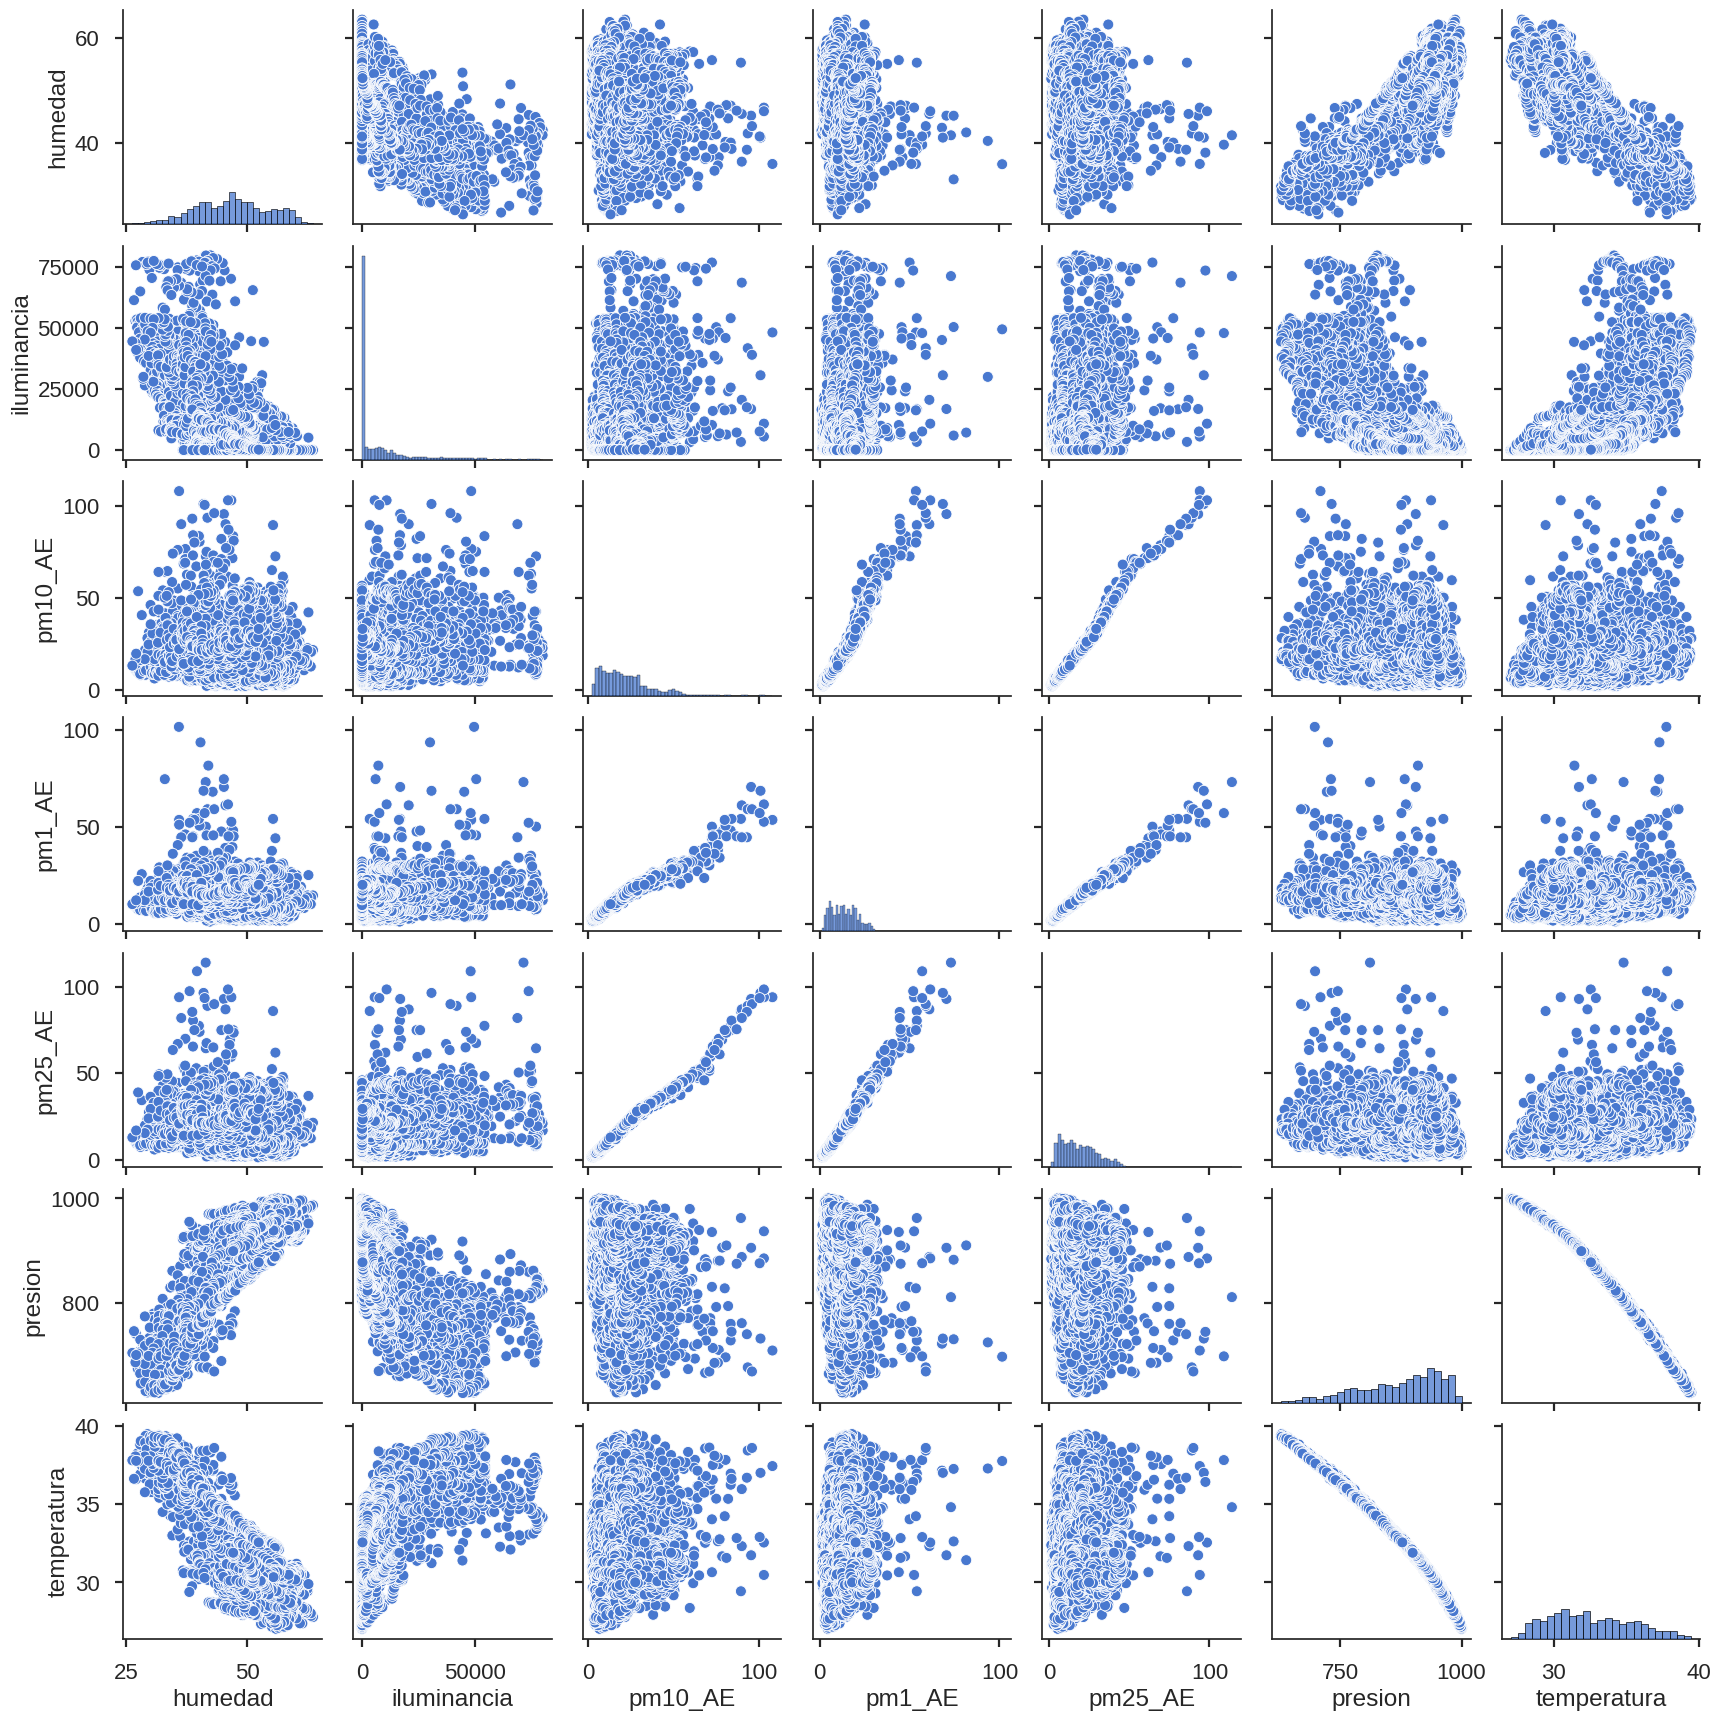

In [97]:
# Subconjunto de variables representativas
subconjunto_variables = ['humedad', 'iluminancia','pm10_AE', 'pm1_AE', 'pm25_AE', 'presion','temperatura']
sns.pairplot(
            data=data_[subconjunto_variables],  # Subconjunto de datos en forma de dataset
            plot_kws = {                        # Caracteristícas graficos fuera de la diagonal
                        'marker':'o',           # Tipo de puntos
                        'size':10},             # Tamaño de puntos
            diag_kind='hist'                    # Tipo de graficos en la diagonal
            )
plt.show()

#### **Gráfico de unión** 
Este gráfico toma dos variables y analiza la correlación entre ellas por medio de líneas de ajuste y de histogramas.

El gráfico de unión o *joint plot* se realiza con la librería de visualización de datos `seaborn`. [Más información aquí](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

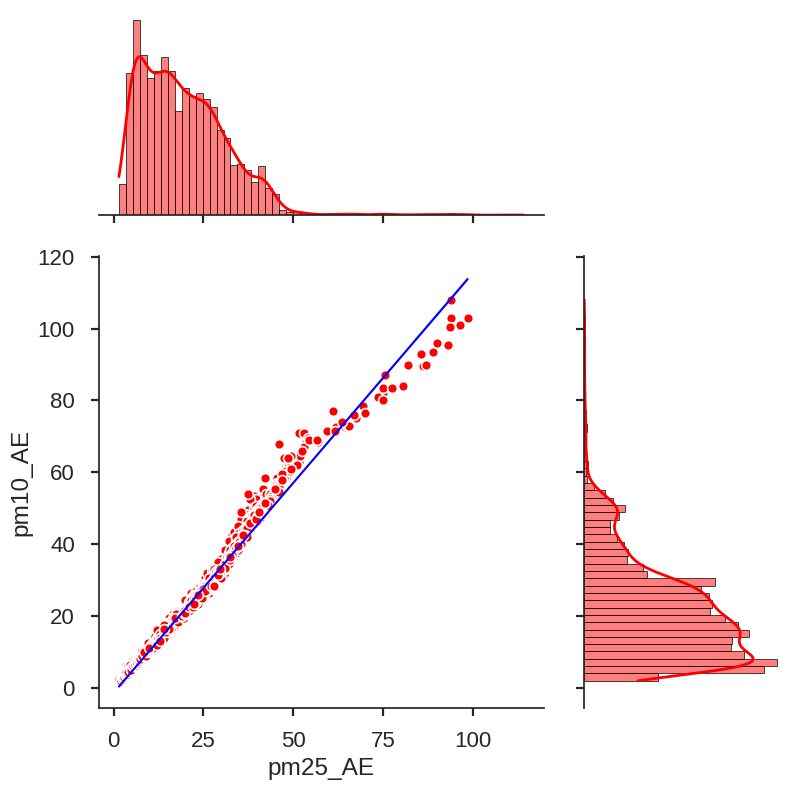

In [166]:
sns.jointplot(x="pm25_AE",  # Datos en el eje x
              y="pm10_AE",  # Datos en el eje y
              data=data_,   # Conjunto de datos
              color="r",    # Color gráfico
              kind='reg',   # Tipo de gráfico. Las opciones son { 'scatter' | 'kde' | 'hist' | 'hex' | 'reg' | 'resid' }
              height=8,     # Tamaño de la figura (análogo de figsize)
              ratio=2,      # Relación de tamaño entre el gráfico principal y los gráficos adyacentes (a los lados)
              scatter_kws={ # Caracteristicas grafico de puntos
                's':50,                # Tamaño de puntos
                'edgecolors':'white',  # Color del borde de los puntos
                'linewidth': 1.2,      # Ancho de la línea de borde
                'alpha':1              # Transparencia línea de borde (0: transparente, 1: visible)
              },
              line_kws={           # Caracteristícas línea de regresión
                'linewidth': 1.5,  # Ancho línea de regresión
                'color':'blue'     # Color línea de regresión
              },
              marginal_kws={       # Caracteristícas de los gráficos adyacentes (a los lados)
                'linewidth': 0.5,  # Ancho del borde del gráfico de barras
                'line_kws':{                  # Caracteristícas línea de regresión 
                            'linewidth':2,    # Ancho línea de regresión
                            'linestyle':'-'   # Estilo línea de regresión
                }
              }
)
plt.show()

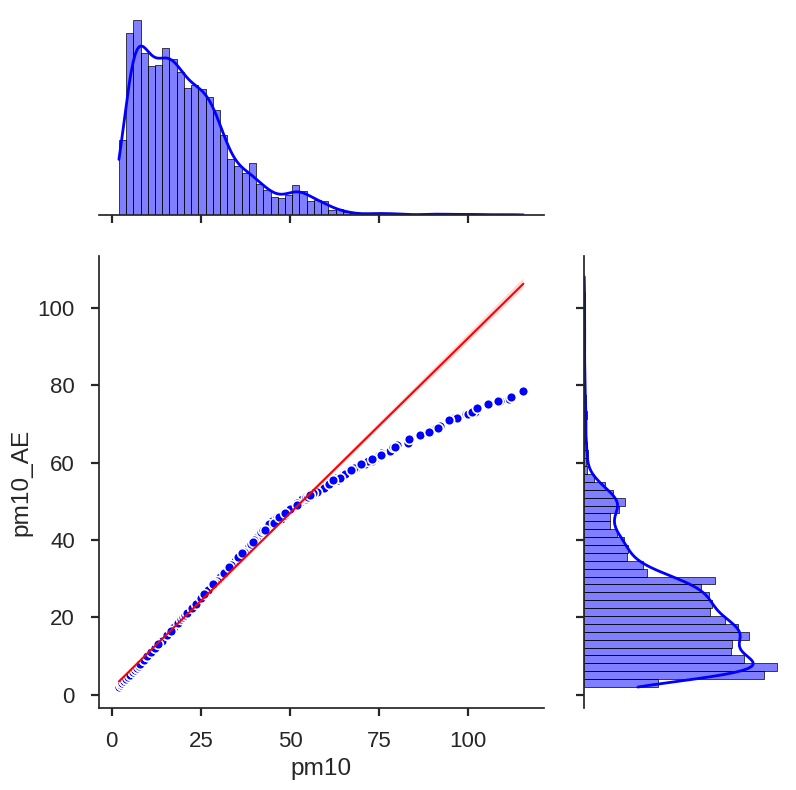

In [168]:
sns.jointplot(x="pm10",  # Datos en el eje x
              y="pm10_AE",  # Datos en el eje y
              data=data_,   # Conjunto de datos
              color='b',    # Color gráfico
              kind='reg',   # Tipo de gráfico. Las opciones son { 'scatter' | 'kde' | 'hist' | 'hex' | 'reg' | 'resid' }
              height=8,     # Tamaño de la figura (análogo de figsize)
              ratio=2,      # Relación de tamaño entre el gráfico principal y los gráficos adyacentes (a los lados)
              scatter_kws={ # Caracteristicas grafico de puntos
                's':50,                # Tamaño de puntos
                'edgecolors':'white',  # Color del borde de los puntos
                'linewidth': 1.2,      # Ancho de la línea de borde
                'alpha':1              # Transparencia línea de borde (0: transparente, 1: visible)
              },
              line_kws={           # Caracteristícas línea de regresión
                'linewidth': 1.5,  # Ancho línea de regresión
                'color':'red'     # Color línea de regresión
              },
              marginal_kws={       # Caracteristícas de los gráficos adyacentes (a los lados)
                'linewidth': 0.5,  # Ancho del borde del gráfico de barras
                'line_kws':{                  # Caracteristícas línea de regresión 
                            'linewidth':2,    # Ancho línea de regresión
                            'linestyle':'-'   # Estilo línea de regresión
                }
              }
)
plt.show()

### **Ecuación de ajuste líneal** 

#### **Ecuación línea recta**

Primero consideremos la ecuación de la línea recta. La línea se caracteriza por dos parámetros, la **pendiente** indica la inclinación de la recta y la **ordenada** indica la ubicación de la línea con respecto al plano $xy$. La pendiente indica qué tan empinada está la línea, entre mayor sea, mayor es su inclinación. Por su parte, la ordenada marca el punto de intersección de la línea con el eje x.

Consideremos la ecuación de la línea recta:
$$y=mx+b$$
A $m$ se le conoce como pendiente y a $b$ como ordenada. Hagamos una tabla de datos para entenderla mejor.

In [9]:
m = 2
b = 0.3

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = m*x+b

tabla = pd.DataFrame({'x':x,'y':y})
tabla

x     y
0    0   0.3
1    1   2.3
2    2   4.3
3    3   6.3
4    4   8.3
5    5  10.3
6    6  12.3
7    7  14.3
8    8  16.3
9    9  18.3
10  10  20.3

Note que para el valor $x=0$, $y$ es igual a la ordenada $b=0.3$. Observe también que si tomamos el valor de $y$ para $x=2$ y su valor para $x=1$, por ejemplo, tendremos que al dividir la diferencia en $y$ entre la diferencia en $x$ se obtiene $\frac{4.3-2.3}{2-1}=2$ que es la pendiente $m$, esto se cumple lal tomar cualquier $m$. Los datos de $y$ dependen de esta manera de los valores de $x$.

Los datos en $x$ y $y$ pueden graficarse en un *scatter plot*

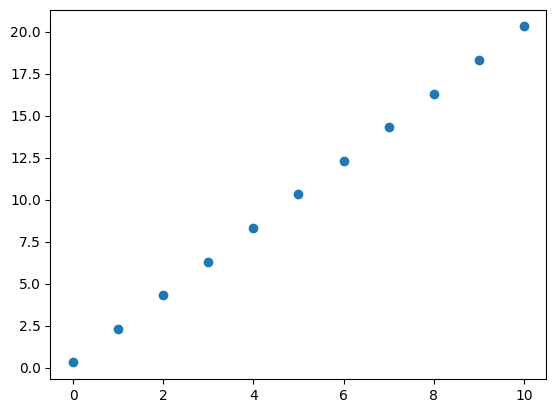

In [10]:
plt.scatter(x,y)

Como vemos, los datos se parecen a una línea recta. Por ello es la ecuación de la línea recta.

#### **Ajuste de datos**

En el ejemplo anterior disponíamos de la ecuación de la línea recta y con ella obteniamos la grafica de puntos. A veces estamos interesados en el problema inverso: dado una nube de puntos cuál es la línea recta que pasa por ella o cuál es la línea que *más se ajusta* a la nube de puntos.

Veamos un ejemplo, supongamos que se dispone de este conjunto de datos:

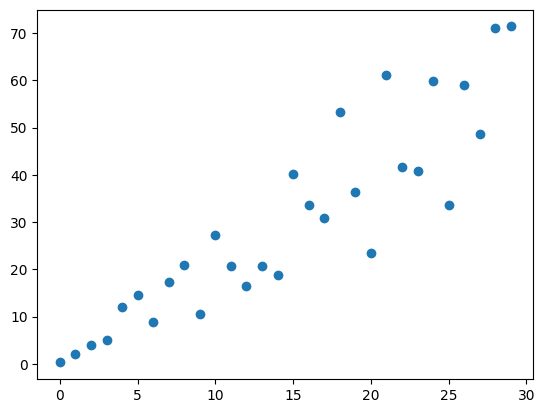

In [29]:
x = np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
              17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])
y = np.array([   0.3,  2.09,  3.90,  5.05, 11.99,
               14.57,  8.86, 17.28, 21.01, 10.57,
               27.27, 20.77, 16.56, 20.68, 18.76,
               40.13, 33.56, 30.83, 53.32, 36.48,
               23.41, 61.17, 41.62, 40.89, 59.79,
               33.70, 59.02, 48.58, 71.03, 71.40])
plt.scatter(x,y)

Claramente, los puntos no están alineados en una línea recta. Pero podemos preguntarnos por cuál sería la mejor línea recta que describe los datos, dicha recta describiría de mejor manera la tendencia que siguen esos datos.

En el ejemplo anterior, la ecuación que mejor se ajusta es $y=2x+0.3$

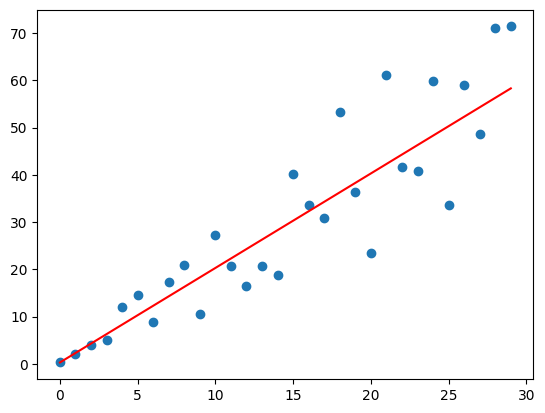

In [32]:
# Para la ecuación de ajuste
xt = np.arange(0,30)  # Puntos en x
yt = 2*xt+0.3         # Puntos en y

plt.scatter(x,y)       # Graficamos nube de puntos
plt.plot(xt,yt, 'red') # Graficamos línea recta de ajuste

A la ecuación de la línea recta que ajusta mejor los datos se le llama *ecuación de ajuste*. En general, un conjunto de datos puede ajustarse por distintas ecuaciones como la cuadrática, por ejemplo.

**Ejemplo: datos de una masa deslizandose sobre una rampa**

En aplicaciones practicas deseamos ajustar los datos de una variable física que varia en el tiempo. Aún cuando sabemos que la grafica de los datos debe ser una línea recta, los datos muestran un esparcimiento en forma de una nube de puntos. Esto se debe a que al hacer una medición física siempre tenemos errores aleatorios asociados al instrumento de medición o a la interacción de agentes externos. A continuación se presenta un ejemplo de una toma y ajuste líneal de los datos de un laboratorío de la carrera de Física, que relacionan la velocidad de una masa (un libro) que se desliza sobre una rampa.

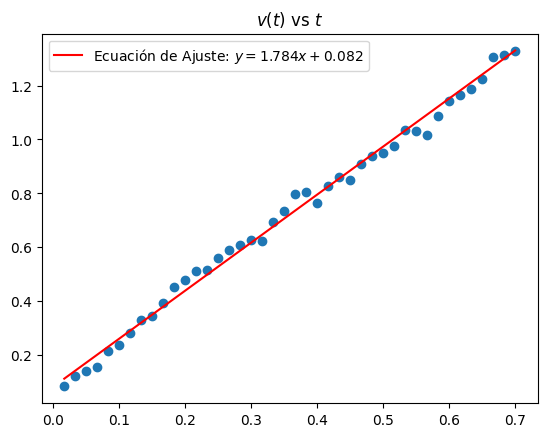

In [42]:
# Tiempo medido en segundos
t = np.array([0.017, 0.033, 0.050, 0.067, 0.083, 0.100, 0.117, 0.133, 0.150, 0.167, 0.183, 0.200, 0.217, 0.233, 
              0.250, 0.267, 0.283, 0.300, 0.317, 0.333, 0.350, 0.367, 0.383, 0.400, 0.417, 0.433, 0.450, 0.467, 
              0.483, 0.500, 0.517, 0.533, 0.550, 0.567, 0.583, 0.600, 0.617, 0.633, 0.650, 0.667, 0.683, 0.700])
     
# Distancia medida en metros    
v = np.array([0.083, 0.121, 0.141, 0.157, 0.213, 0.238, 0.281, 0.330, 0.344, 0.394, 0.454, 0.478, 0.510, 0.514, 
              0.560, 0.588, 0.610, 0.625, 0.623, 0.692, 0.734, 0.799, 0.804, 0.763, 0.829, 0.862, 0.848, 0.909, 
              0.937, 0.951, 0.975, 1.034, 1.033, 1.015, 1.087, 1.143, 1.164, 1.187, 1.224, 1.305, 1.312, 1.330])

m = 1.7840
b = 0.0817
tt = t
vt = m*tt + b


plt.title('$v(t)$ vs $t$')
plt.scatter(t,v)
plt.plot(tt,vt,'red', label = 'Ecuación de Ajuste: $y=%.3f x + %.3f$'%(m,b))
plt.legend()

### **Ajuste líneal de algunos datos de la MiniEva**

A continuación hallamos la ecuación de ajuste de la regresión lineal. Como los datos continen filas con `None` debemos eliminarlas para que no haya error al usar `linregress`. Para esto usamos el comando `dropna()`

#### 1. Usando `curve_fit`  

In [193]:
from scipy.optimize import curve_fit

data_xy = data_[['pm10','pm10_AE']].dropna() # Creamos un dataset con las variables que deseamos comparar y eliminamos las filas con None
def linea_recta(x,m,b):  # Función de ajuste
    y = m*x + b          # m: pendiente, b: ordenada
    return y
params, var = curve_fit(                     # params: parámetros de ajuste, var: varianza
                        linea_recta,         # Función de ajuste que le aplicaremos a los datos
                        data_xy['pm10'],     # Datos en x
                        data_xy['pm10_AE']   # Datos en y
                        )
cov = np.sqrt(np.diag(var))    # Covarinza

print('params =',params)
print('cov    =', cov)
print('Ecuación de la recta: Y = %.3f X + (%.3f)'%(params[0],params[1]))

params = [0.90522915 1.63121427]
cov    = [0.00159891 0.04152468]
Ecuación de la recta: Y = 0.905 X + (1.631)


#### 2. Usando `linregress`

In [194]:
data_XY = data_[['pm10','pm10_AE']].dropna() # Creamos un dataset con las variables que deseamos comparar y eliminamos las filas con None

# Hallamos datos con linregress
pendiente, intercepto, r_value, p_value, std = sp.stats.linregress(                           # r_value: coeficiente Pearson, p_value: probabilidad de obtener datos por fuera de la recta de ajuste, std: desviación estándar
                                                                   data_XY['pm10'].values,    # Datos eje x
                                                                   data_XY['pm10_AE'].values  # Datos eje y
                                                                  )
print('Ecuación de la recta: Y = %.3f X + (%.3f)'%(pendiente, intercepto))

Ecuación de la recta: Y = 0.905 X + (1.631)


### **Otros gráficos**

<big> **Implot** </big>

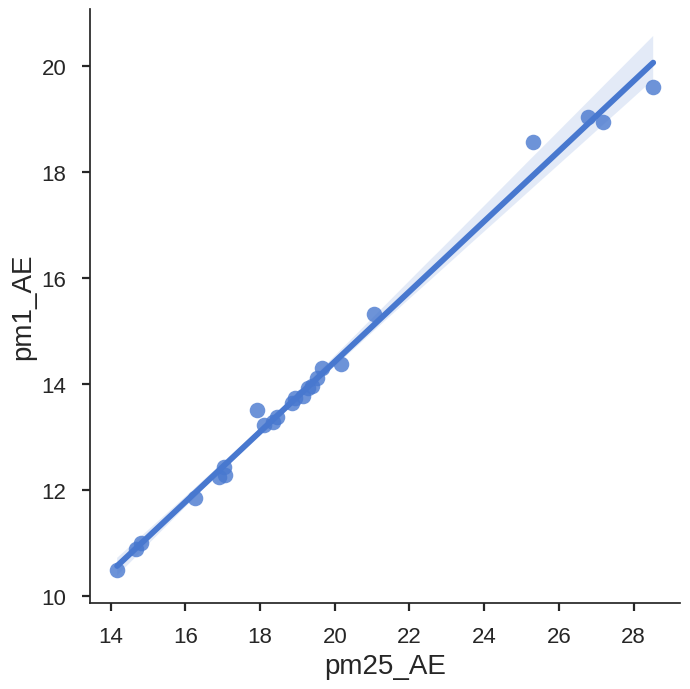

In [183]:
data.index = pd.DatetimeIndex(data.index) # Convierte a tipo datetime el índice
data_['h'] = data.index.hour              # Columna que asigna la hora a cada fila del conjunto de datos
data_h = data_.groupby('h').mean()        # Agrupamos todos los datos de una misma hora usando promedio

sns.lmplot(x='pm25_AE',   # Datos eje x
           y='pm1_AE',    # Datos eje y
           data=data_h,   # Conjunto de datos
           height=7       # Tamaño de gráfica (análogo a figsize) 
) 

<big> **Jointplot con datos por horas**</big>

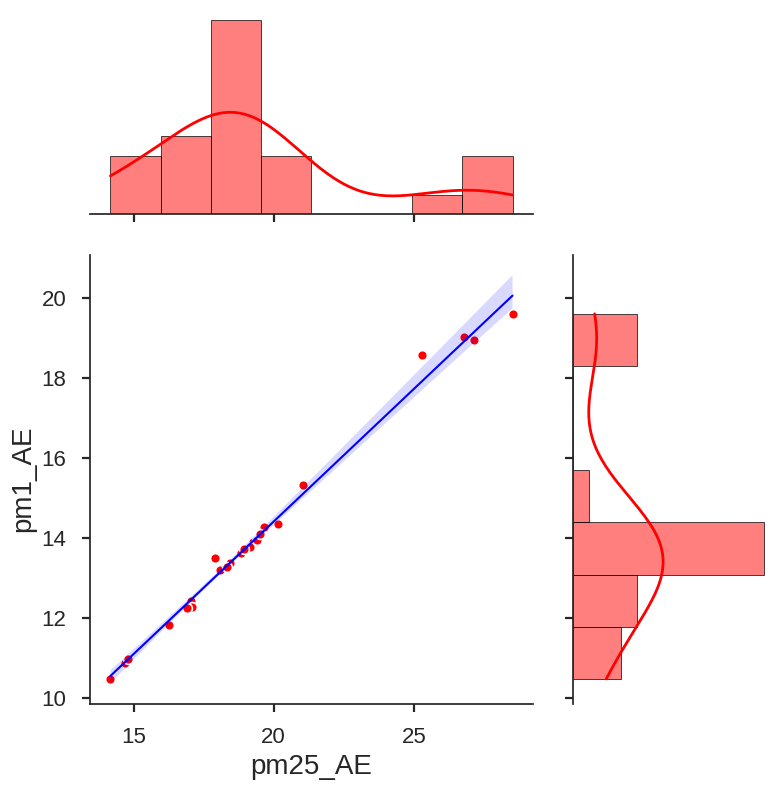

In [ ]:
sns.jointplot(x="pm25_AE",  # Datos en el eje x
              y="pm1_AE",  # Datos en el eje y
              data=data_h,   # Conjunto de datos
              color="r",    # Color gráfico
              kind='reg',   # Tipo de gráfico. Las opciones son { 'scatter' | 'kde' | 'hist' | 'hex' | 'reg' | 'resid' }
              height=8,     # Tamaño de la figura (análogo de figsize)
              ratio=2,      # Relación de tamaño entre el gráfico principal y los gráficos adyacentes (a los lados)
              scatter_kws={ # Caracteristicas grafico de puntos
                's':50,                # Tamaño de puntos
                'edgecolors':'white',  # Color del borde de los puntos
                'linewidth': 1.2,      # Ancho de la línea de borde
                'alpha':1              # Transparencia línea de borde (0: transparente, 1: visible)
              },
              line_kws={           # Caracteristícas línea de regresión
                'linewidth': 1.5,  # Ancho línea de regresión
                'color':'blue'     # Color línea de regresión
              },
              marginal_kws={       # Caracteristícas de los gráficos adyacentes (a los lados)
                'linewidth': 0.5,  # Ancho del borde del gráfico de barras
                'line_kws':{                  # Caracteristícas línea de regresión 
                            'linewidth':2,    # Ancho línea de regresión
                            'linestyle':'-'   # Estilo línea de regresión
                }
              }
)
plt.show()

<img width="150px"  src="https://raw.githubusercontent.com/AndresGuarin/Images/main/moncora_ejercicios_cartel.png" align="center">

---

Ahora que ya has visto como analizar tus datos, puedes probar con diferentes variables y datos. Juega un poco con los datos realizando los siguientes ejercicios.

1. Elige dos variables del set de datos `data_` o `data_h` y gráfica la correlación entre los datos ¿Qué puedes decir acerca de las dos variables, una depende de la otra?

2. Elige dos variables fuertemente correlacionadas ($|r|>0.8$). Ahora toma los datos de tres colegios en el mismo rango de tiempo y analiza si la correlación es la misma en las tres estaciones.

3. Para este ejercicio debes comparar dos regresiones líneales entre valores de PM y PM_AE.
    
    **a)** Crea un nuevo datset llamado `data_pm_mayor` con los datos de la estacion `mE1_00007` entre las fechas `2023-04-30 00:00:00` y `2023-05-07 23:00:00`. Elimina los datos por debajo de $60$ y los datos por encima de $120$ (*Ayuda: revisa el contenido de la sección 2. Limpieza de datos*). Haz una regresión líneal entre `PM10` y `PM10_AE`. 
    
    **b)** Ahora crea un nuevo dataset llamado `data_pm_menor` con los datos de la misma estación y entre las mismas fechas. En este caso, elimina los datos por encima de $60$. Nuevamente haz una regresión líneal entre `PM10` y `PM10_AE`.

    **c)** Finalmente, compara las pendientes obtenidas en las regresiones líneales anteriores. ¿Cuál de esas pendientes es mayor que la otra? ¿Cuál crees que sea el aporte del número $60$ en los resultados de las pendientes? ¿Cómo interpretas tus resultados? 